In [ ]:
# Spam detection: Introduction



Imagine you have an email inbox, and every day you receive numerous messages. Among those messages, some are relevant and important, like messages from friends, family, or work-related contacts. However, you also receive unwanted messages that try to sell you something, promote scams, or contain irrelevant content.

Spam detection is like having a virtual assistant that helps you automatically distinguish between these two types of messages. It looks at various characteristics of the messages, such as the sender's information, the content of the message, and any attached links or files. Based on these characteristics, the spam detection system uses clever algorithms to make a prediction: Is this message likely to be spam or not?

The system uses patterns and rules it has learned from analyzing a large dataset of known spam and non-spam messages. It looks for clues or red flags that suggest a message might be spam, such as suspicious sender addresses, unusual content, or common phrases used in spam messages.

By using sophisticated algorithms and machine learning techniques, the spam detection system can become quite accurate over time. It continuously learns from new examples and adjusts its rules and patterns to adapt to evolving spam techniques.

The ultimate goal of spam detection is to protect you from unwanted messages, save your time and effort, and ensure that you only receive relevant and important communication. It acts as a filter, keeping your inbox clean and ensuring that you don't fall victim to scams or waste time dealing with irrelevant messages.

In [ ]:
#importing libraries
import pandas as pd
import numpy as np

In [ ]:
#reading dataset
df=pd.read_csv('/content/spam.csv',encoding='latin-1')

In [ ]:
#checking size of dataframe
df.shape

(5572, 5)

In [ ]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
#dropping un necessary columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
#renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [ ]:
df.head(2)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


**Label Encoding**<br>
Label encoding is commonly used in machine learning tasks when dealing with categorical target variables. The target variable, also known as the dependent variable or response variable, is the variable that you want to predict or classify.

In many machine learning algorithms, the target variable needs to be represented numerically for the model to process it effectively. Label encoding provides a way to convert categorical labels into numerical values.

we need to apply the label encoding only to the target variable and not the feature variables, as encoding the features in a similar way could introduce bias or incorrect assumptions into the model.

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

After applying fit_transform(), the encoded column would look like this:

0
1
0
0
In this transformed column, the machine learning algorithm can now understand that 'ham' is represented by 0 and 'spam' is represented by 1.

In [ ]:
df.head(2)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...


In [ ]:
#Checking missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
#cheking duplicated values
df.duplicated().sum()

403

In [ ]:
#dropping duplicates value
print("before removing duplicates;",df.shape)
df.drop_duplicates(keep='first',inplace=True)
print("after removing duplicates",df.shape)

before removing duplicates; (5572, 2)
after removing duplicates (5169, 2)


# EDA

<Axes: >

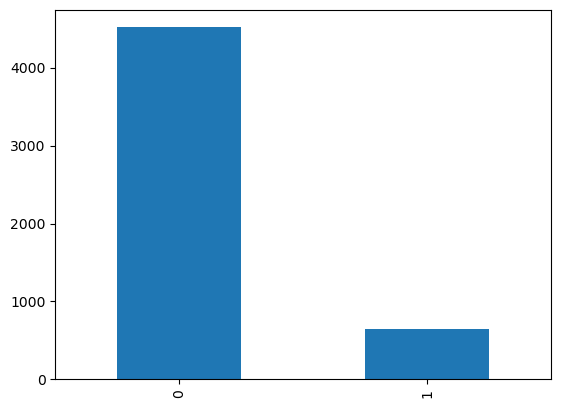

In [ ]:
#Checking counts of Ham and spam
df['target'].value_counts().plot(kind='bar')

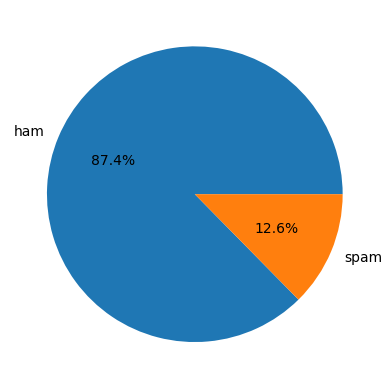

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df["target"].value_counts(),labels=['ham','spam'],autopct='%1.1f%%')
plt.show()

We can see we have more number of data for ham as compared to spam,It means we have imbalanced dataset

## Feature Engineering: Adding Text-related Columns for Character, Word, and Sentence Counts

Now,lets add three new columns<br>
1.num_characters : which counts how many characters are there in each text row <br>
2.num_words : which counts how many words are there in each text row <br>
3.num_sentences: which counts how many sentence are there in each text row <br>

In [ ]:
import nltk

In [ ]:
#num of characters
df['num_characters'] = df['text'].apply(len)
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
#num of sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head(2)

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2


Lets understand the range and variability of character counts, word counts, and sentence counts
in the text data.

In [ ]:
#overall(ham and spam)
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286129,1.961308
std,58.236293,13.226400,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


num_characters: The average (mean) number of characters in the text messages is approximately 79. The standard deviation of 58 suggests a relatively wide variation in the character counts. The minimum character count is 2, while the maximum is 910. The 25th percentile indicates that 25% of the messages have 36 or fewer characters, and the 75th percentile shows that 75% of the messages have 117 or fewer characters.

num_words: On average, the text messages contain around 18 words. The standard deviation is approximately 13, indicating some variability in word counts. The minimum number of words is 1, and the maximum is 219. The 25th percentile suggests that 25% of the messages have 9 or fewer words, while the 75th percentile indicates that 75% of the messages have 26 or fewer words.

num_sentences: The average number of sentences in the text messages is approximately 2. The standard deviation of 1.4 indicates a moderate variation in the sentence counts. The minimum and maximum values are 1 and 38, respectively. The 25th percentile suggests that 25% of the messages have 1 sentence, while the 75th percentile indicates that 75% of the messages have 2 or fewer sentences.

Lets understand the range and variability of character counts, word counts, and sentence counts
of **ham**in the text data.

In [ ]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.957484,1.815545
std,56.358207,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


Lets understand the range and variability of character counts, word counts, and sentence counts of spam in the text data.

In [ ]:
# spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


Comparing the statistics for the columns 'num_characters', 'num_words', and 'num_sentences' from the different datasets (ham vs. spam), the following observations can be made:

1. `num_characters`:
   - The average character count in the spam dataset (138) is significantly higher compared to the ham dataset (79).
   - The standard deviation for character counts in the spam dataset (30.1) is lower than that in the ham dataset (56.4), indicating less variability in character counts for spam messages.
   - The range of character counts in the spam dataset (13 to 224) is narrower compared to the ham dataset (2 to 910).

2. `num_words`:
   - The average word count in the spam dataset (27.5) is higher compared to the ham dataset (18.3).
   - The standard deviation for word counts in the spam dataset (6.9) is lower than that in the ham dataset (13.2), indicating less variability in word counts for spam messages.
   - The range of word counts in the spam dataset (2 to 44) is narrower compared to the ham dataset (1 to 219).

3. `num_sentences`:
   - The average number of sentences in the spam dataset (2.97) is higher compared to the ham dataset (1.96).
   - The standard deviation for sentence counts in the spam dataset (1.49) is slightly higher than that in the ham dataset (1.43), indicating similar variability in sentence counts for both spam and ham messages.
   - The range of sentence counts in the spam dataset (1 to 9) is narrower compared to the ham dataset (1 to 38).

**spam messages tend to have higher average counts for characters, words, and sentences compared to the ham messages. Additionally, the spam messages generally exhibit lower standard deviations, indicating less variability in the counts. These differences suggest that spam messages are typically longer, contain more words, and have slightly more sentences compared to ham messages**

**Lets Visualize**

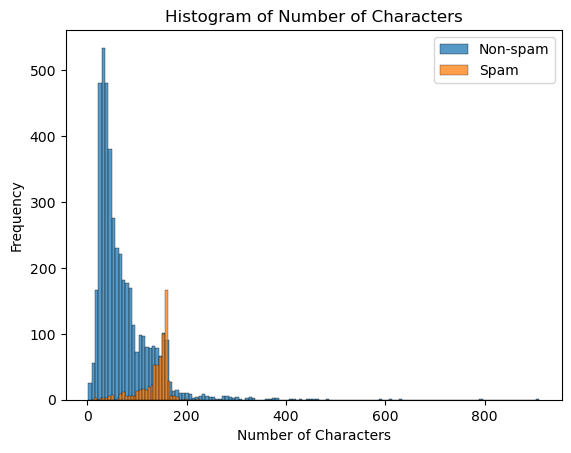

In [ ]:
#num_characters
import seaborn as sns
sns.histplot(df[df['target'] == 0]['num_characters'], label='Non-spam')
sns.histplot(df[df['target'] == 1]['num_characters'], label='Spam')

plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Characters')

plt.legend()

plt.show()

As we can see,we have higher average counts for characters in spam as compared to ham

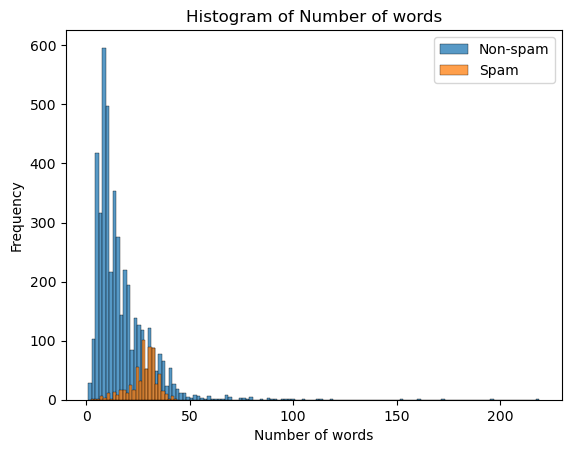

In [ ]:
#num_words
sns.histplot(df[df['target'] == 0]['num_words'], label='Non-spam')
sns.histplot(df[df['target'] == 1]['num_words'], label='Spam')

plt.xlabel('Number of words')
plt.ylabel('Frequency')
plt.title('Histogram of Number of words')

plt.legend()

plt.show()

Also,we have higher average counts for words in spam as compared to ham

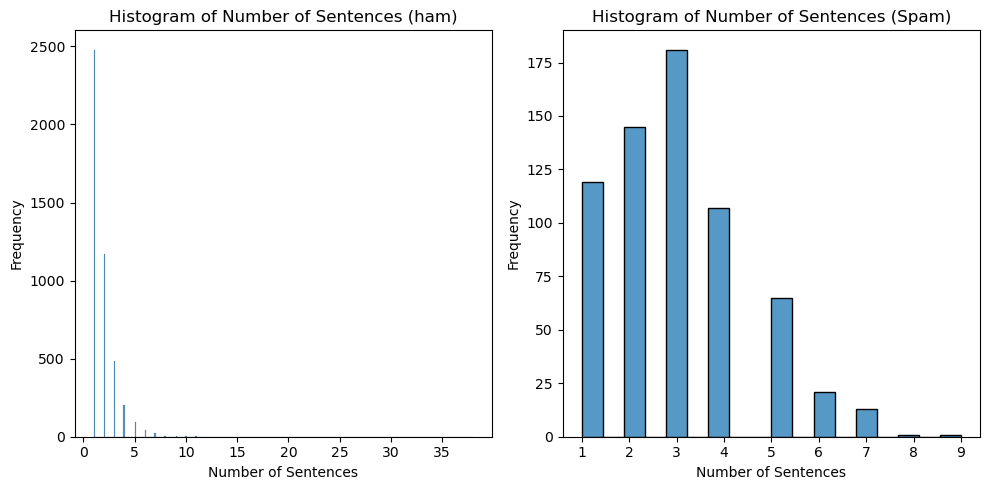

In [ ]:
# for num_sentences

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot for non-spam messages
sns.histplot(df[df['target'] == 0]['num_sentences'], ax=axes[0])
axes[0].set_xlabel('Number of Sentences')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Number of Sentences (ham)')

# Plot for spam messages
sns.histplot(df[df['target'] == 1]['num_sentences'], ax=axes[1])
axes[1].set_xlabel('Number of Sentences')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Number of Sentences (Spam)')

plt.tight_layout()
plt.show()


**Need of correlation**

Here's why correlation analysis is useful:

1. Understanding Important Features: By examining the correlation between each feature and the spam/non-spam classification, we can determine which features are more important in distinguishing between spam and non-spam messages. For example, certain features like the number of exclamation marks or specific keywords may be strongly correlated with spam messages.

2. Reducing Redundancy: Correlation analysis helps us identify if there are any features that are highly similar or redundant. Including highly correlated features in the classifier can lead to confusion and less accurate predictions. By identifying and removing redundant features, we can make the classifier more efficient and avoid repetition of similar information.

3. Creating New Features: Correlation analysis can inspire the creation of new features. For example, if we find that the length of the subject line in an email is highly correlated with spam messages, we might create a new feature that represents the ratio of uppercase letters in the subject line. This new feature could potentially improve the classifier's ability to distinguish between spam and non-spam.

4. Understanding Factors Behind Classification: Correlation analysis helps us interpret the results of the classifier. By examining the correlation between features and the spam/non-spam classification, we can gain insights into which factors are positively or negatively associated with spam or non-spam messages. This understanding allows us to explain why the classifier makes certain classification decisions.

In summary, correlation analysis helps us identify important features, reduce redundancy, create new features, and understand the factors that contribute to the spam/non-spam classification. It is a useful tool in building an effective and interpretable spam/non-spam classifier.

In [ ]:
#finding correlation
df.corr()

/tmp/ipykernel_20/3876712518.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.264198,0.267602
num_characters,0.384717,1.000000,0.965307,0.626118
num_words,0.264198,0.965307,1.000000,0.683561
num_sentences,0.267602,0.626118,0.683561,1.000000


/tmp/ipykernel_20/383490316.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

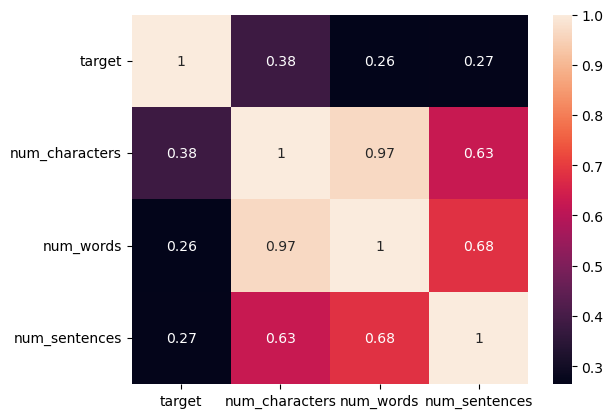

In [ ]:
#visualize correlation
sns.heatmap(df.corr(),annot=True)

**Observation**

1. Correlation between 'target' and other variables:

   - 'target' has a positive correlation of 0.38 with 'num_characters', which means that as the number of characters in a message increases, the likelihood of the message being classified as spam also increases, to some extent.
   - Similarly, 'target' has a positive correlation of 0.26 with 'num_words' and 0.27 with 'num_sentences'. This suggests that as the number of words or sentences in a message increases, the probability of the message being classified as spam also increases, but not as strongly as the correlation with 'num_characters'.

2. Correlation between the numerical variables:

   - 'num_characters' and 'num_words' have a strong positive correlation of 0.97, indicating that as the number of characters in a message increases, the number of words also tends to increase. This makes sense because longer messages typically contain more words.
   - 'num_characters' and 'num_sentences' have a moderate positive correlation of 0.63. This suggests that as the number of characters in a message increases, the number of sentences tends to increase, but the relationship is not as strong as the correlation between 'num_characters' and 'num_words'.
   - 'num_words' and 'num_sentences' also have a moderate positive correlation of 0.68, indicating that as the number of words in a message increases, the number of sentences tends to increase, but again, the relationship is not as strong as the correlation between 'num_characters' and 'num_words'.

Overall, this correlation matrix provides insights into the relationships between the variables in the ham/spam classifier. It suggests that the length of the message, measured in terms of characters, words, and sentences, is somewhat correlated with the likelihood of the message being classified as spam. Additionally, there are correlations between the different length measures themselves, indicating some degree of interdependence between them.

# Text Pre-processing

**Need of Text_pre_processing**

**Cleaning the Text:** Text data  may contain unnecessary elements like special characters, punctuation marks, or symbols that don't contribute to the classification. Preprocessing helps remove these elements, allowing the classifier to focus on the important words and patterns in the messages.

**Standardizing Words:** Text can have different forms due to variations like pluralization or verb tense. Preprocessing techniques like stemming or lemmatization convert words to their base form, reducing variations and ensuring that similar words are treated the same. This makes it easier for the classifier to recognize common features across messages.

**Removing Stop Words:** Stop words are common words like "the," "is," or "and" that occur frequently but don't carry much meaning in distinguishing spam from non-spam. Removing stop words helps reduce the complexity of the text and allows the classifier to focus on more informative words that can better differentiate between spam and non-spam messages.

**Enhancing Efficiency:** Preprocessing techniques like removing unnecessary words, reducing variations, and cleaning the text help reduce the amount of data the classifier needs to analyze. This improves the efficiency of the classifier, allowing it to process and classify messages faster and more accurately.

**Improving Accuracy:** By applying text preprocessing techniques, the ham/spam classifier can better identify important patterns and features that distinguish spam from non-spam messages. This leads to improved accuracy in classifying messages correctly, ensuring that spam messages are correctly identified and filtered out.

In summary, text preprocessing is crucial  as it helps clean the text, standardize words, remove unnecessary elements, and improve efficiency. These steps allow the classifier to focus on the relevant content and patterns in the messages, leading to more accurate identification and classification of text

Below are the steps we are taking to pre-process our text

1. **Lowercasing:** Lowercasing involves converting all the text to lowercase letters. This step is necessary to ensure uniformity in the text data. For example, "Hello" and "hello" should be treated as the same word.

2. **Tokenization:** Tokenization is the process of breaking down the text into individual words or tokens. It helps in splitting the text into meaningful units. For example, the sentence "I love dogs" would be tokenized into three separate tokens: "I," "love," and "dogs."

3. **Removing Special Characters:** Special characters such as punctuation marks, symbols, or any non-alphanumeric characters are often removed from the text. This step is performed to eliminate noise and focus on the essential textual content.

4. **Removing Stop Words and Punctuation:** Stop words are common words like "the," "is," or "and" that do not carry significant meaning in the context of the text analysis. Removing stop words helps in reducing the dimensionality of the data and improving computational efficiency. Additionally, removing punctuation marks helps to further clean the text and remove any unnecessary symbols.

5. **Stemming:** Stemming is the process of reducing words to their root or base form. It involves removing suffixes and transformations to obtain the core meaning of a word. For example, stemming would convert words like "running," "runs," and "ran" to their common base form, "run." This step helps in standardizing the words and reducing the vocabulary size.

Lets do all the pre processing in the following code

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# Function to transform the text
def transform_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Tokenize the text into individual words
    text = nltk.word_tokenize(text)

    # Create an empty list to store filtered words
    filtered_words = []

    # Iterate over each word in the text
    for word in text:
        # Check if the word contains only alphanumeric characters
        if word.isalnum():
            # Add the word to the filtered list
            filtered_words.append(word)

    # Update the text with the filtered words
    text = filtered_words[:]

    # Clear the filtered words list for reuse
    filtered_words.clear()

    # Remove stop words and punctuation from the text
    for word in text:
        # Check if the word is not a stop word or punctuation mark
        if word not in stopwords.words('english') and word not in string.punctuation:
            # Add the word to the filtered list
            filtered_words.append(word)

    # Update the text with the filtered words
    text = filtered_words[:]

    # Clear the filtered words list for reuse
    filtered_words.clear()

    # Apply stemming to the words in the text
    stemmer = PorterStemmer()
    for word in text:
        # Perform stemming on each word
        stemmed_word = stemmer.stem(word)
        # Add the stemmed word to the filtered list
        filtered_words.append(stemmed_word)

    # Join the filtered words to form the transformed text
    transformed_text = " ".join(filtered_words)

    # Return the transformed text
    return transformed_text


In [ ]:
# Create a new column in the dataframe to store the transformed text
df['transformed_text'] = df['text'].apply(transform_text)

Above code  adds a new column called 'transformed_text' to the dataframe (df) and applies the 'transform_text' function to each element in the 'text' column. The 'transform_text' function is responsible for transforming the text by converting it to lowercase, tokenizing it into individual words, removing non-alphanumeric characters, filtering out stop words and punctuation, performing stemming, and joining the filtered words back into a transformed text. <br>
By using the 'apply' method, the 'transform_text' function is applied to each element of the 'text' column, and the resulting transformed text is stored in the 'transformed_text' column.

In [ ]:
df.head(2)

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni


Now,Lets visualize what are frequent words in both Ham and spam

**Word cloud**

A word cloud is a visual representation of text data where the size of each word indicates its frequency or importance in the given text. It helps to visually highlight the most common or significant words in a text document.

Imagine you have a document filled with lots of words. A word cloud takes those words and shows them in a visually appealing way. The more frequent a word appears in the document, the larger and bolder it appears in the word cloud.

For example, let's say you have a collection of customer reviews about a product. By creating a word cloud, you can quickly see which words are used most frequently by customers to describe their experience with the product. The words that appear larger in the word cloud are the ones that are mentioned more often by customers, indicating that those words are significant or commonly associated with the product.

In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

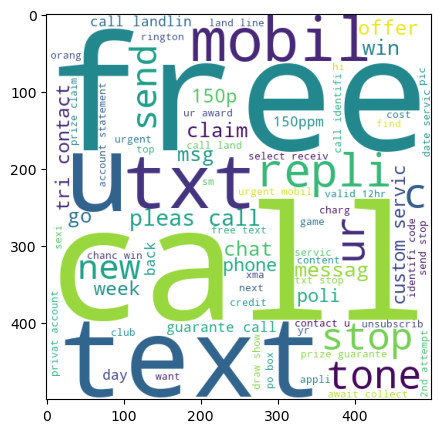

In [ ]:
#generating Word cloud for only Spam words
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(10,5))
plt.imshow(spam_wc)
plt.show()

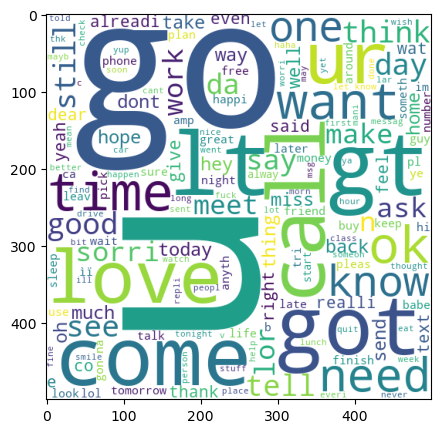

In [ ]:
#generating Word cloud for only ham words

ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(10,5))
plt.imshow(ham_wc)
plt.show()

**Lets find top 25 words from both ham and spam text**

In [ ]:
df.head(1)

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...


**Top 25 words from ham corpus**

In [ ]:
ham_frequncy = []  # Create an empty list to store the words from ham messages
# Iterate over each message in the transformed_text column of ham messages
for msg in df[df['target'] == 0]['transformed_text'].to_list():
    # Split the message into individual words
    for word in msg.split():
        # Append each word to the ham_frequncy list
        ham_frequncy.append(word)


Above code goes through each transformed text message in the "ham" category and splits it into individual words. <br>
It then adds each word to the ham_frequncy list. <br>
ham_frequncy will contain all the words from the "ham" messages, allowing you to analyze their frequency or perform further processing.

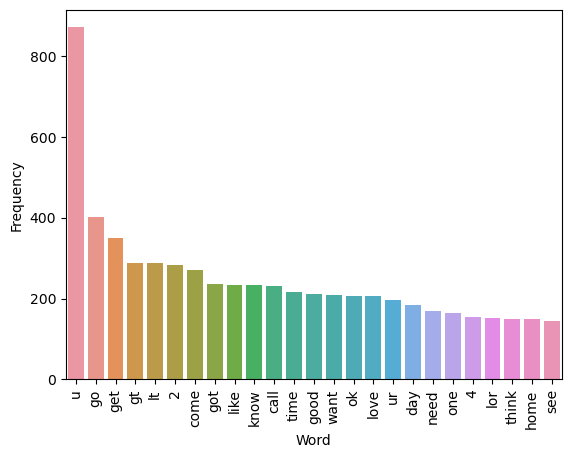

In [ ]:
from collections import Counter
# Count the frequency of each word in the ham_frequncy list
word_frequency = Counter(ham_frequncy)

# Retrieve the 25 most common words along with their frequencies
most_common_words = word_frequency.most_common(25)

# Create a dataframe from the most_common_words list
df_most_common = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Plot the bar plot
sns.barplot(data=df_most_common, x='Word', y='Frequency')
plt.xticks(rotation='vertical')
plt.show()


**Top 25 words from Spam corpus**

In [ ]:
spam_frequncy = []  # Create an empty list to store the words from ham messages
# Iterate over each message in the transformed_text column of ham messages
for msg in df[df['target'] == 1]['transformed_text'].to_list():
    # Split the message into individual words
    for word in msg.split():
        # Append each word to the ham_frequncy list
        spam_frequncy.append(word)

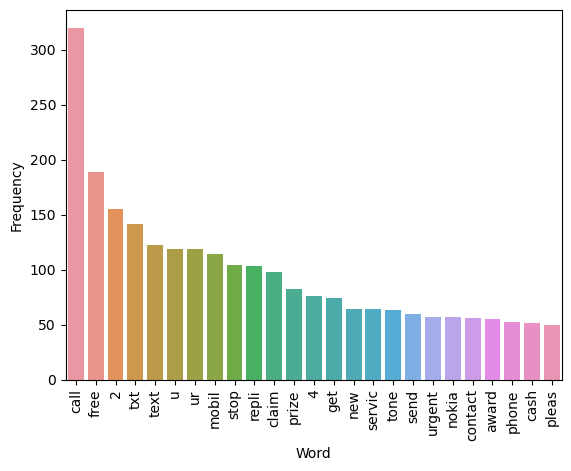

In [ ]:
# Count the frequency of each word in the spam_frequncy list
word_frequency = Counter(spam_frequncy)

# Retrieve the 25 most common words along with their frequencies
most_common_words_spam = word_frequency.most_common(25)

# Create a dataframe from the most_common_words list
df_most_common_spam = pd.DataFrame(most_common_words_spam, columns=['Word', 'Frequency'])

# Plot the bar plot
sns.barplot(data=df_most_common_spam, x='Word', y='Frequency')
plt.xticks(rotation='vertical')
plt.show()


# Model Building

## Vectorization

In NLP, the ultimate goal is to enable computers to understand and work with human language. However, computers primarily operate on numerical data. So, to bridge the gap between human language and computational algorithms, we need to convert text into a numerical format that machines can process effectively. This is where vectorization comes into play.

By converting text into numerical vectors, we can apply machine learning algorithms, perform mathematical operations, extract meaningful features, and process large amounts of text data effectively. It helps machines "translate" human language into a format they can comprehend and work with, enabling a wide range of applications, from language translation and sentiment analysis to chatbots and text summarization.

## Bag of Words Vectorization

Refer below link for better understanding

https://www.kaggle.com/code/adityaghuse/movie-recommendation-beginner-friendly?scriptVersionId=135129626&cellId=52

Lets implement BOW vectorization on our text

In [ ]:
#we are taking most frequent 5000 words from the vocabulary
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

Below code takes the text data in df['transformed_text'], converts it into a numerical representation using CountVectorizer, and stores the transformed data in the variable X as a 2D array.<br>
Each row in X corresponds to a text sample, and each column represents a specific word or term from the vocabulary of the text data. The values in the array indicate the frequency or presence of each word or term in the respective text sample.

In [ ]:
# Transform the text data into a numerical representation using CountVectorizer
#and convert it into a 2D array
X = cv.fit_transform(df['transformed_text']).toarray()


**Need of .toarray()**

When we use the **fit_transform()** method of the CountVectorizer, it transforms the text data into a numerical representation known as a sparse matrix. A sparse matrix only stores the non-zero elements, which is an efficient way to represent text data since most text samples will only contain a small subset of all possible words.

However, in some cases, we might need to work with the transformed data in a different format. By using the .toarray() method, we convert the sparse matrix into a 2D array (an array of arrays). Each row in the array corresponds to a text sample, and each column represents a specific word or term from the vocabulary of the text data. The values in the array indicate the frequency or presence of each word or term in the respective text sample.

Converting the sparse matrix to a 2D array makes it easier to perform certain operations or calculations on the data. It allows us to access individual elements directly and perform various computations. Therefore, using .toarray() provides a more accessible and intuitive representation of the transformed text data, especially for tasks that require array-based operations.

In summary, the .toarray() method is used to convert the transformed text data from a sparse matrix representation to a 2D array, making it easier to work with and manipulate the data in various ways.








In [ ]:
X.shape

(5169, 6629)

In this case, (5169, 5000) means that X is a 2D array with 5169 rows and 5000 columns. Each row corresponds to a text sample in the df['transformed_text'] data, and each column represents a specific word or term from the vocabulary.

The number of rows, 5169, indicates that there are 5169 text samples in the dataset. Each row in X corresponds to a unique text sample.

The number of columns, 5000, represents the size of the vocabulary used for the transformation. This means that the CountVectorizer identified 5000 unique words or terms in the df['transformed_text'] data.

In [ ]:
# Extract the values from the 'target' column of the DataFrame and store them in variable 'y'
y = df['target'].values

**Train Test Split**

When working with machine learning, it's important to evaluate the performance of the models we build. To do that, we need to assess how well the model generalizes to unseen data. This is where the train_test_split function comes into play.

Imagine you have a dataset with input features (X) and corresponding target values (y). The train_test_split function allows you to split this dataset into two separate parts: a training set and a testing set.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting the data into training and testing sets
# X represents the input features and y represents the target variable
# The data is split into a training set and a testing set
# The testing set size is set to 20% of the entire dataset
# The random_state parameter is set to 2 to ensure reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


**Precision Score**

Precision score matters a lot in situations where the focus is on minimizing false positives and ensuring that the positive predictions made by a model are highly accurate. Precision is a metric commonly used in binary classification problems, particularly when the class distribution is **imbalanced.**

Here are a few scenarios where precision score is crucial:

1. Medical Diagnostics: In medical diagnostics, precision is vital because the cost of false positives can be high. For example, in cancer screening, a high precision score ensures that patients identified as positive for cancer are more likely to have the disease, reducing unnecessary anxiety and medical procedures.

2. Fraud Detection: When detecting fraudulent transactions or activities, precision is crucial to minimize false alarms. A high precision score ensures that the flagged cases are highly likely to be genuine frauds, reducing the time and effort spent on investigating false positives.

3. Spam Filtering: In email or message spam filtering, precision is important to avoid filtering legitimate messages as spam. High precision ensures that the messages classified as spam are indeed unwanted, providing a better user experience.

4. Legal and Security Systems: In legal and security domains, precision is significant to avoid false accusations or wrongful convictions. For instance, in facial recognition systems used for identifying criminals or suspects, high precision helps prevent innocent individuals from being falsely implicated.

In these scenarios, precision is prioritized over other metrics like recall or accuracy, as the cost or impact of false positives is typically higher than false negatives. However, it's important to consider the specific context and requirements of each problem to determine which evaluation metric is most appropriate.

Also,In our problem of SMS Spam detection we are going to focus more on **precision score**

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()
# Create a Multinomial Naive Bayes classifier
mnb = MultinomialNB()
# Create a Bernoulli Naive Bayes classifier
bnb = BernoulliNB()

**Gaussian Naive Bayes classifier**

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.874274661508704
[[786 110]
 [ 20 118]]
0.5175438596491229


The precision score of 0.51 indicates the proportion of correctly predicted positive outcomes (118) out of the total instances that were predicted as positive (118 + 20).It tells us that out of all the instances the model identified as positive, around 51.8% were actually positive.

**Multinomial Naive Bayes classifier**

In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))


0.965183752417795
[[872  24]
 [ 12 126]]
0.84


The precision score of 0.87 indicates the proportion of correctly predicted positive outcomes (126) out of the total instances that were predicted as positive (126 + 12).It tells us that out of all the instances the model identified as positive, around 87% were actually positive.

**Bernoulli Naive Bayes classifier**

In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9709864603481625
[[893   3]
 [ 27 111]]
0.9736842105263158


The precision score of 0.97 indicates the proportion of correctly predicted positive outcomes (111) out of the total instances that were predicted as positive (111 + 27). It tells us that out of all the instances the model identified as positive, around 97% were actually positive.

Maximum precision we have got is close to **97%** with Bernoulli Naive Bayes classifier.<br>
Lets try other vectorization and check do we get different resullts.

## Tf_IDF Vectorization

TF-IDF stands for "Term Frequency-Inverse Document Frequency." It is a numerical representation technique used for text data, such as documents, articles, or web pages. TF-IDF vectorization is a way to convert this textual information into a numerical representation that machine learning algorithms can understand.

Here's how it works:

1. **Term Frequency (TF)**: TF measures how frequently a term (word) appears in a document. It calculates the ratio of the number of times a term appears in a document to the total number of terms in that document. The idea is that the more often a term appears in a document, the more important it might be in describing that document.

2. **Inverse Document Frequency (IDF)**: IDF measures the importance of a term across multiple documents. It calculates the logarithm of the ratio between the total number of documents and the number of documents that contain a particular term. The rationale behind IDF is that terms that appear in fewer documents might carry more significance or specificity in describing a particular document.

3. **TF-IDF**: To get the TF-IDF score for a term in a document, we multiply the TF score and the IDF score for that term. The TF-IDF score combines the local importance of the term within a document (TF) with the global importance of the term across all documents (IDF).

4. **Vectorization**: After calculating the TF-IDF scores for all terms in each document, we represent each document as a vector, where each element of the vector corresponds to the TF-IDF score of a specific term. In other words, we convert the textual data into a numerical representation, where each document is now represented as a set of TF-IDF values.

The resulting TF-IDF vectors can be used as input for machine learning algorithms. They capture the importance of different terms in each document, allowing algorithms to identify patterns, make predictions, or perform other tasks based on these numerical representations.

In summary, TF-IDF vectorization converts text data into numerical representations by considering the frequency of terms in a document (TF) and their importance across multiple documents (IDF). This allows machine learning algorithms to process and analyze textual information effectively.

Lets implement Tf-Idf vectorizer on our text to check weather it is performed well as compared to BoW

In [ ]:
#create TF-IDF vectorizer (TfidfVectorizer) with a maximum of 3000 features.
#The max_features parameter is set to 3000.
#This specifies that only the top 3000 features (words) should be considered during the vectorization process.
#By limiting the number of features, it can help reduce the dimensionality of the resulting vectors and potentially improve computational efficiency.

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
# Perform TF-IDF vectorization on the 'transformed_text' column of the dataframe
X = tfidf.fit_transform(df['transformed_text']).toarray()
# Create a variable 'y' containing the values of the 'target' column
y = df['target'].values


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

**Gaussian Naive Bayes classifier**

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.867504835589942
[[785 111]
 [ 26 112]]
0.5022421524663677


The precision score of 0.50 indicates the proportion of correctly predicted positive outcomes (112) out of the total instances that were predicted as positive (112 + 26).It tells us that out of all the instances the model identified as positive, around 50.2% were actually positive.

**Multinomial Naive Bayes classifier**

In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9729206963249516
[[896   0]
 [ 28 110]]
1.0


The precision score of **1.0** indicates that the model achieved perfect precision.It means that all instances predicted as positive were indeed positive. In other words, every positive prediction made by the model was correct with Accuracy of 97%

**Bernoulli Naive Bayes classifier**

In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9816247582205029
[[895   1]
 [ 18 120]]
0.9917355371900827


The precision score of 0.99 indicates the proportion of correctly predicted positive outcomes (120) out of the total instances that were predicted as positive (120 + 18). In simpler terms, it tells us that out of all the instances the model identified as positive, around 99.17% were actually positive.

The precision score of **1.0** with **Multinomial Naive Bayes classifier** has achieved perfect precision.
In other words, every positive prediction made by the model was correct with Accuracy of 97%.

Lets try out with other model as well to check weather our accuracy improve or not

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
# Create different classifier models
svc = SVC(kernel='sigmoid', gamma=1.0)  # Support Vector Classifier with sigmoid kernel
knc = KNeighborsClassifier()  # K-Nearest Neighbors Classifier
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)  # Decision Tree Classifier with maximum depth of 5
lrc = LogisticRegression(solver='liblinear', penalty='l1')  # Logistic Regression Classifier with L1 regularization
rfc = RandomForestClassifier(n_estimators=50, random_state=2)  # Random Forest Classifier with 50 decision trees
abc = AdaBoostClassifier(n_estimators=50, random_state=2)  # AdaBoost Classifier with 50 weak learners
bc = BaggingClassifier(n_estimators=50, random_state=2)  # Bagging Classifier with 50 base estimators
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)  # Extra Trees Classifier with 50 decision trees
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)  # Gradient Boosting Classifier with 50 boosting stages
xgb = XGBClassifier(n_estimators=50, random_state=2)  # XGBoost Classifier with 50 boosting rounds



In [ ]:
#The clfs dictionary represents a collection of different machine learning algorithms that can be used for classification tasks.
#Each algorithm is associated with a key that serves as its name.
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'DT': dtc,
    'NB': mnb,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    # Train the classifier model using the training data
    clf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Calculate the accuracy score by comparing the predicted labels with the true labels
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate the precision score by comparing the predicted labels with the true labels
    precision = precision_score(y_test, y_pred)

    # Return the accuracy and precision scores
    return accuracy, precision


Now,We have different machine learning models, and we want to see how well they perform on our data. So, we iterate over each model, train it using the training data, make predictions on the test data, and calculate the accuracy (how correct the predictions are) and precision (how well it identifies positive cases) scores. We print these scores for each model and store them for later analysis.

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9748549323017408
Precision -  0.9666666666666667
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  DT
Accuracy -  0.9352030947775629
Precision -  0.8585858585858586
For  NB
Accuracy -  0.9729206963249516
Precision -  1.0
For  LR
Accuracy -  0.9574468085106383
Precision -  0.9519230769230769
For  RF
Accuracy -  0.971953578336557
Precision -  0.9739130434782609
For  AdaBoost
Accuracy -  0.9642166344294004
Precision -  0.9316239316239316
For  BgC
Accuracy -  0.9545454545454546
Precision -  0.8527131782945736
For  ETC
Accuracy -  0.9777562862669246
Precision -  0.9831932773109243
For  GBDT
Accuracy -  0.9487427466150871
Precision -  0.9292929292929293
For  xgb
Accuracy -  0.9690522243713733
Precision -  0.9416666666666667


In [ ]:
# Create a DataFrame to store performance metrics of different algorithms
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores})

In [ ]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.974855,0.966667
1,KN,0.905222,1.000000
2,DT,0.935203,0.858586
3,NB,0.972921,1.000000
4,LR,0.957447,0.951923
5,RF,0.971954,0.973913
6,AdaBoost,0.964217,0.931624
7,BgC,0.954545,0.852713
8,ETC,0.977756,0.983193
9,GBDT,0.948743,0.929293


In [ ]:
# Sort the DataFrame based on the 'Precision' column in descending order
performance_df = performance_df.sort_values('Precision', ascending=False)

In [ ]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
3,NB,0.972921,1.000000
8,ETC,0.977756,0.983193
5,RF,0.971954,0.973913
0,SVC,0.974855,0.966667
4,LR,0.957447,0.951923
10,xgb,0.969052,0.941667
6,AdaBoost,0.964217,0.931624
9,GBDT,0.948743,0.929293
2,DT,0.935203,0.858586


# Conclusion

Based on the results the **Naive Bayes (NB) algorithm** has the highest accuracy and precision scores among all the algorithms evaluated for detecting whether a message is spam or not.

1. Accuracy: NB achieved an accuracy of 0.97, which means it correctly classified approximately 97.29% of the messages as either spam or not spam. This high accuracy suggests that NB is effective in distinguishing between spam and non-spam messages.

2. Precision: NB obtained a precision score of 1.000, indicating that when it predicted a message as spam, it was correct 100% of the time. In other words, NB has a very low false positive rate, meaning it rarely misclassifies non-spam messages as spam.

Considering these results, NB stands out as a strong choice for spam detection. It offers a high overall accuracy and an impressive precision score, ensuring that when it predicts a message as spam, it is highly likely to be correct.

**We are going to use Naive Bayes model as our final model for prediction**